In [1]:
import pandas as pd #to manipulate Data
import numpy as np #to do numerical operations
import matplotlib.pyplot as plt #to plot graph
import seaborn as sns #to plot graph with extra visualization features
from sklearn.preprocessing import StandardScaler #to transform data in z-score normalization
%matplotlib inline
#to avoid info and plots graph directly below code

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv') #Load given Dataset
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.columns #to display columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [5]:
df.dtypes #to display columns with datatypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [6]:
df.describe() #it describes the numerical columns with following parameters like (count,mean,min,max,std,quartiles)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
numerical_df = pd.DataFrame(df.select_dtypes(include=[np.number])) #using select_dtypes numerical column saparated from main dataset and created new dataframe
numerical_df #to store numerical dataframe created one variable

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [8]:
nc=pd.DataFrame(df,columns=['Volume','Avg Price','Total Sales Value','Discount Rate (%)',
                            'Discount Amount','Net Sales Value']) #using list all numerical columns stored in list and created new dataframe created 
nc #to store numerical dataframe created one variable

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [9]:
nc.describe() #describing numerical dataframe

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [10]:
nc.mean() #to display mean of each coulmn in numerical dataframe

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [11]:
nc.median() #to display median of each coulmn in numerical dataframe

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [12]:
nc.mode().iloc[0] #to display mode of each coulmn in numerical dataframe

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [13]:
nc.std() #to display standard daviation of each coulmn in numerical dataframe

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [14]:
nc.columns #to display columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

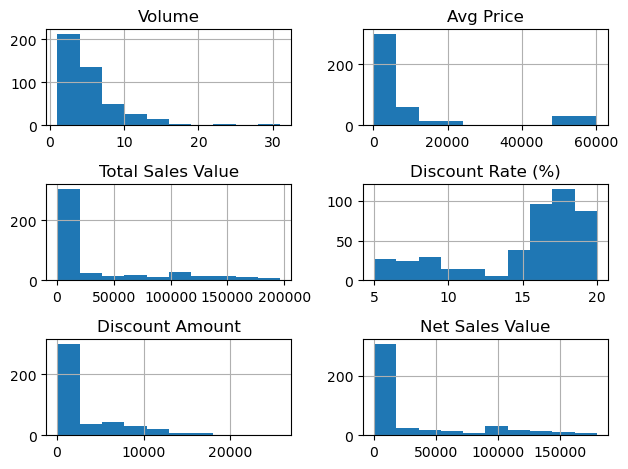

In [15]:
nc.hist() #to plot histogram for each column in numerical dataframe and findout the skewness
plt.tight_layout() #to avoid overlapping of graph

<Axes: >

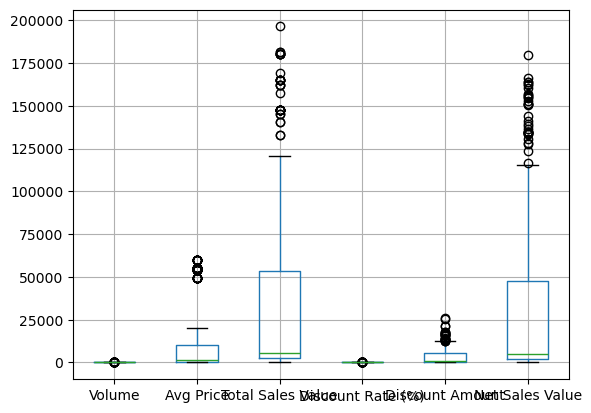

In [16]:
nc.boxplot() #to plot boxplot and findings of outliers of each column in numerical dataframe

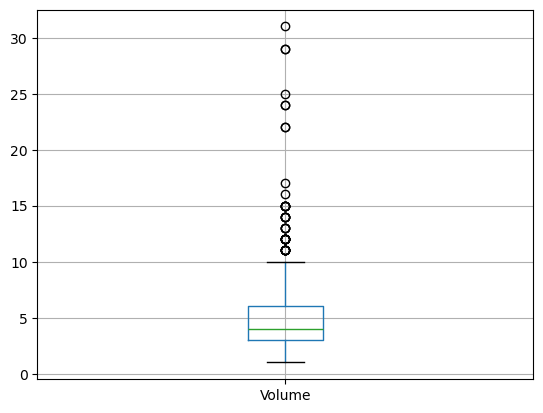

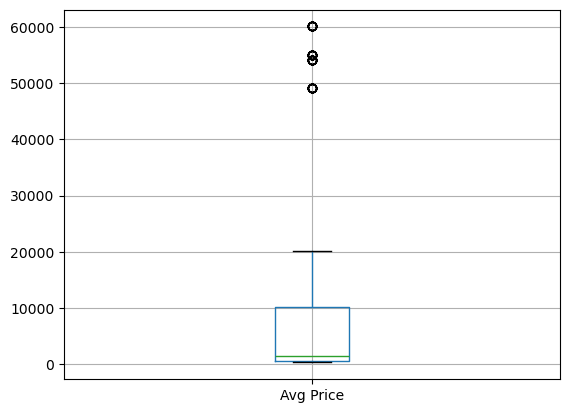

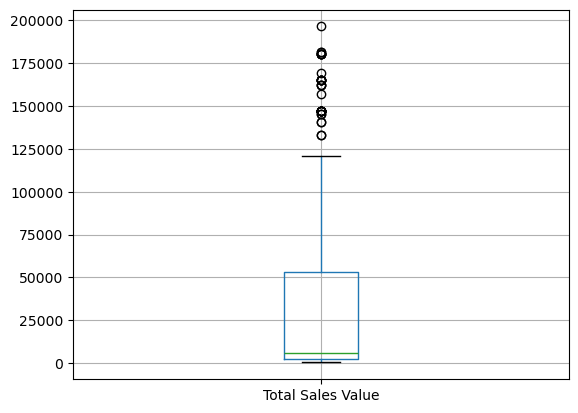

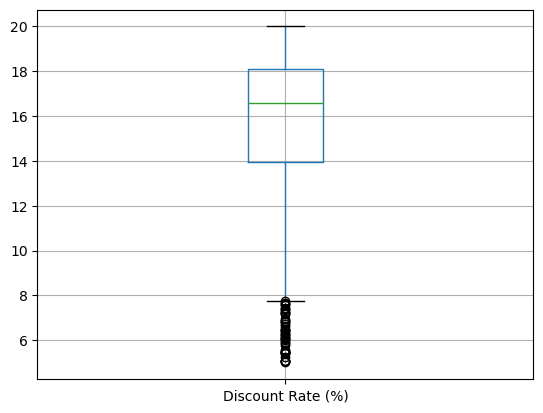

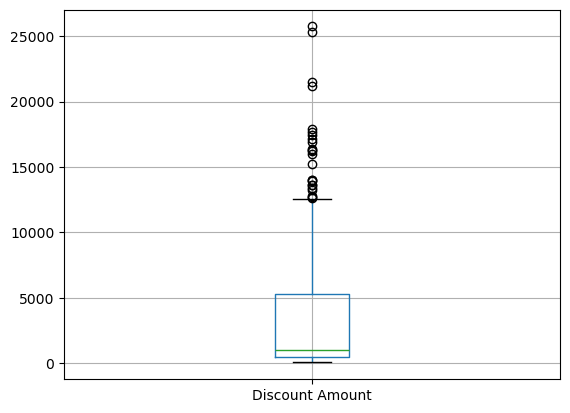

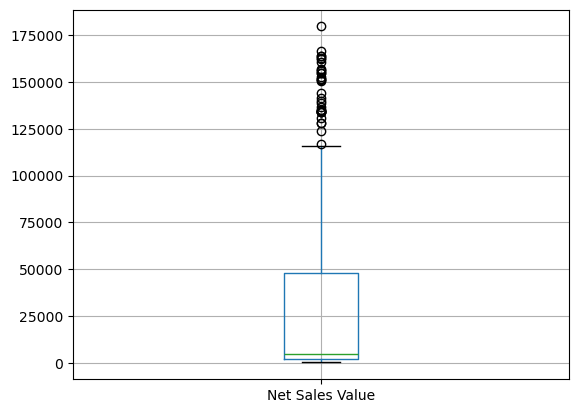

In [17]:
for column in nc: #columns in numerical dataframe
    plt.figure() #plot new figure
    nc.boxplot([column]) #to display outlier properly from each column in numerical dataframe using for loop

In [18]:
#to calculate IQR
for column in nc.columns: #columns in numerical dataframe
    Q1 = df[column].quantile(0.25) #to calculate 1st quartile range
    Q3 = df[column].quantile(0.75) #to calculate 3rd quartile range
    IQR = Q3 - Q1 #to calculate Interquartile range
    lower_extreme = Q1 - 1.5 * IQR #to calculate lower extreme
    upper_extreme = Q3 + 1.5 * IQR #to calculate upper extreme

    print(f"Column: {column}") #displays column name from numerical dataframe
    print(f"Q1 (25th percentile): {Q1}") #displays 1st quartile
    print(f"Q3 (75th percentile): {Q3}") #displays 3rd quartile
    print(f"IQR: {IQR}") #displays Interquartile range
    print(f"Lower extreme for outliers: {lower_extreme}") #displays lower extreme
    print(f"Upper extreme for outliers: {upper_extreme}") #displays upper extreme

Column: Volume
Q1 (25th percentile): 3.0
Q3 (75th percentile): 6.0
IQR: 3.0
Lower extreme for outliers: -1.5
Upper extreme for outliers: 10.5
Column: Avg Price
Q1 (25th percentile): 465.0
Q3 (75th percentile): 10100.0
IQR: 9635.0
Lower extreme for outliers: -13987.5
Upper extreme for outliers: 24552.5
Column: Total Sales Value
Q1 (25th percentile): 2700.0
Q3 (75th percentile): 53200.0
IQR: 50500.0
Lower extreme for outliers: -73050.0
Upper extreme for outliers: 128950.0
Column: Discount Rate (%)
Q1 (25th percentile): 13.965062543701741
Q3 (75th percentile): 18.114718477752703
IQR: 4.149655934050962
Lower extreme for outliers: 7.740578642625298
Upper extreme for outliers: 24.339202378829146
Column: Discount Amount
Q1 (25th percentile): 460.4593038855329
Q3 (75th percentile): 5316.4954266866525
IQR: 4856.03612280112
Lower extreme for outliers: -6823.594880316146
Upper extreme for outliers: 12600.54961088833
Column: Net Sales Value
Q1 (25th percentile): 2202.2086453212287
Q3 (75th percent

In [19]:
categorical_categorical_df=pd.DataFrame(df.select_dtypes(include=[object])) #using select_dtypes object means categorical columns saparated from main dataset and dataframe created
categorical_categorical_df #to store categorical columns variable created 

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [20]:
cc=pd.DataFrame(df,columns=['Date','Day','SKU','City','BU','Brand','Model']) #using list all categorical columns stpored in list and dataframe created
cc # variable created to store categorical columns

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [21]:
Date_Frequency=cc['Date'].value_counts() #display series of unique values with its count
Date_Frequency

01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: Date, dtype: int64

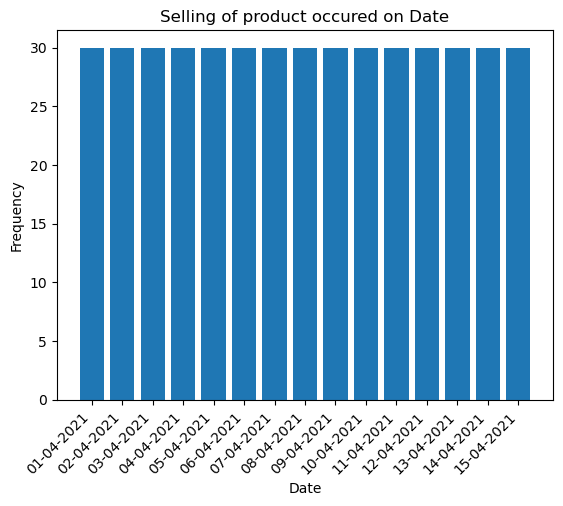

In [22]:
plt.bar(Date_Frequency.index,Date_Frequency.values) #to plot barplot
plt.title('Selling of product occured on Date') #displays title
plt.xlabel('Date') #displays x-axis label
plt.ylabel('Frequency') #displays y-axis label
plt.rcParams['figure.figsize']=(20,7) #to set height and width of graph
plt.rcParams['figure.dpi']=250 #to set resolution of graph
plt.xticks(rotation=45, ha='right') #displays rotated names of each bars in barplot to avoid overlapping
plt.show() #displays graph

In [23]:
Day_Frequency=cc['Day'].value_counts() #display series of unique values with its count
Day_Frequency

Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: Day, dtype: int64

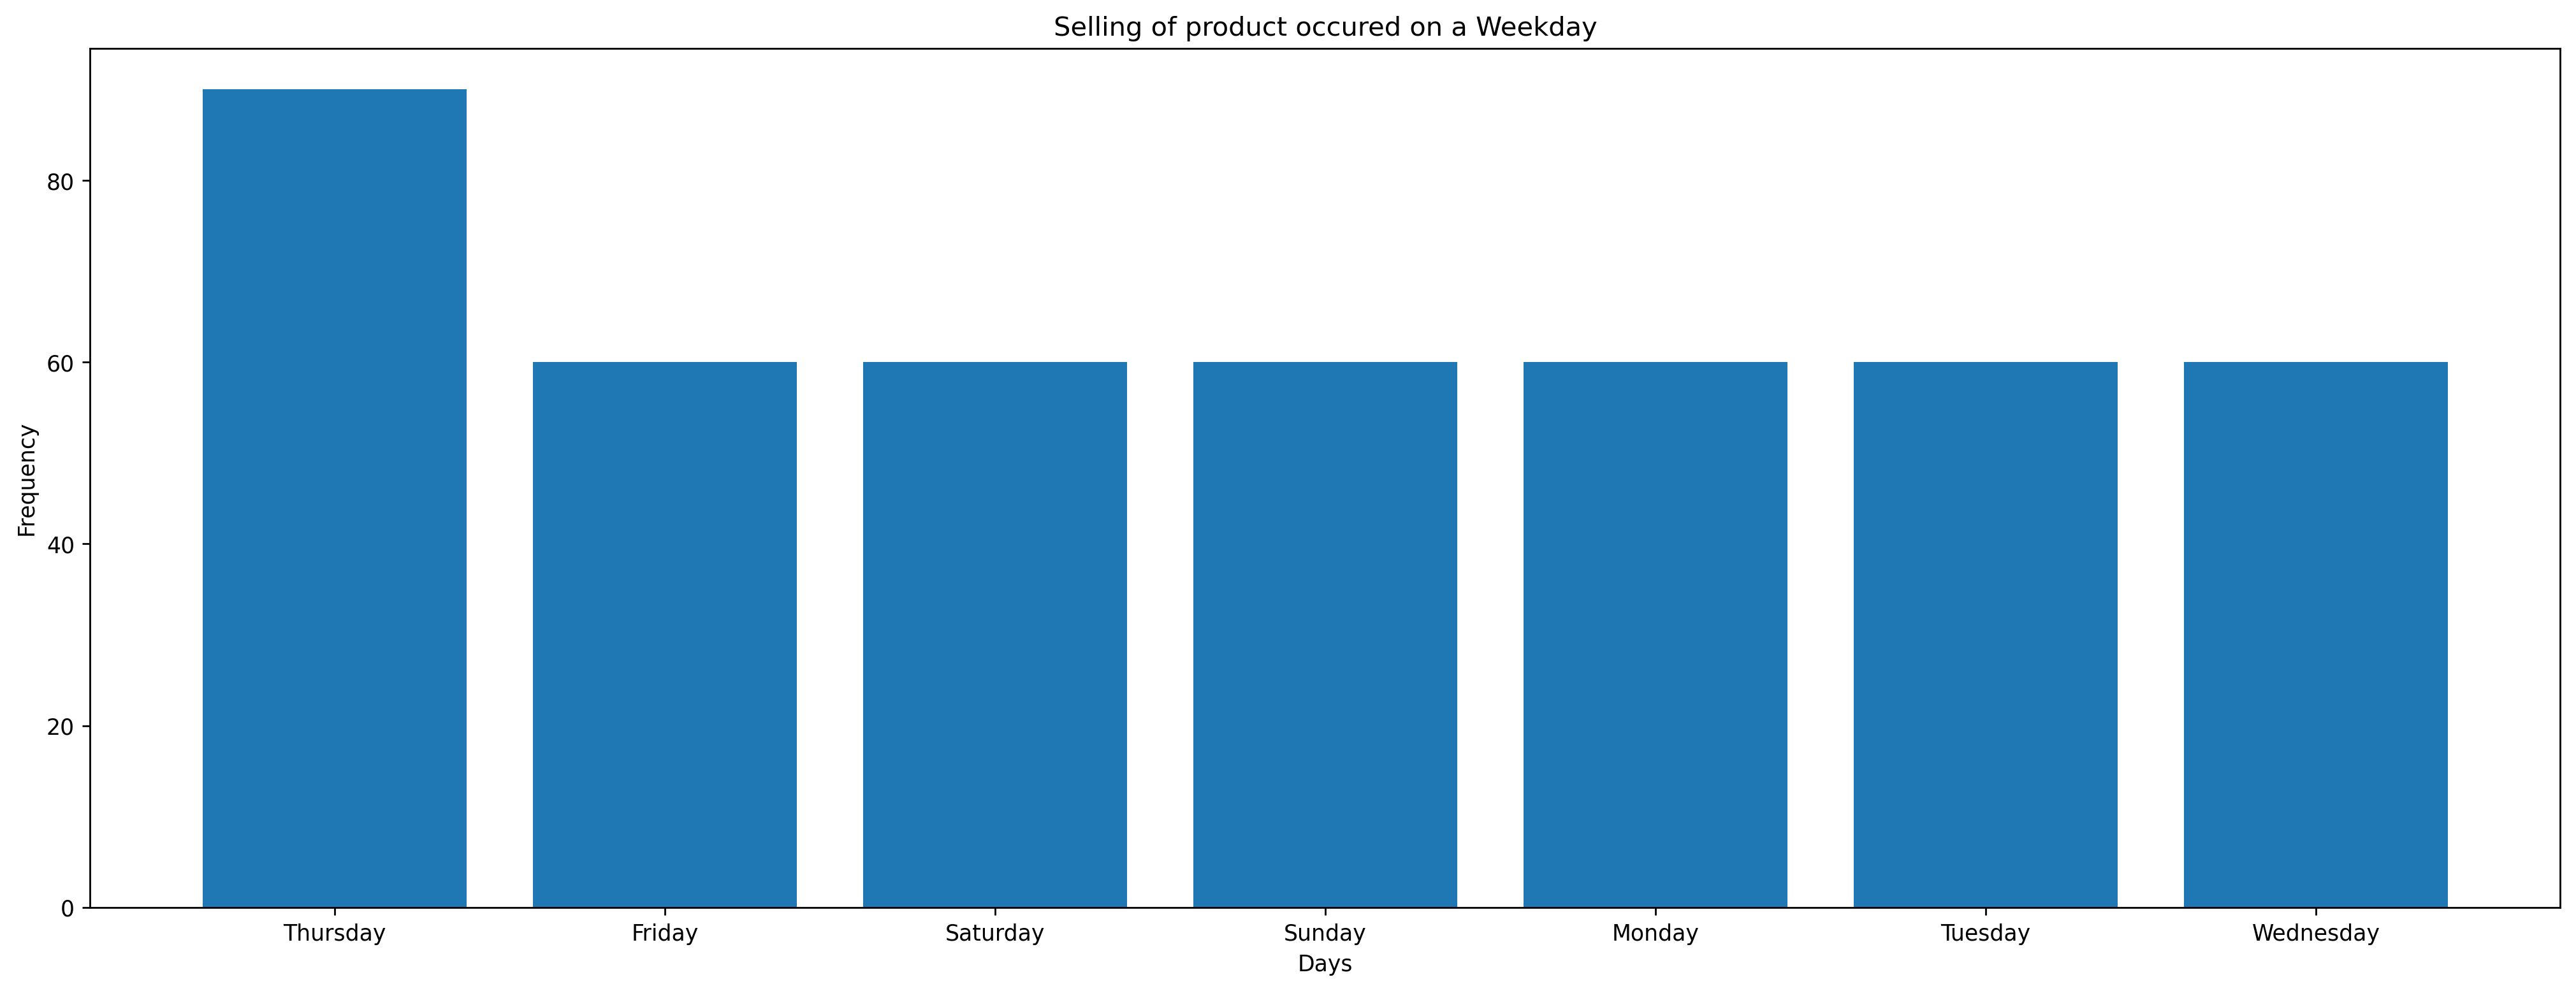

In [24]:
plt.bar(Day_Frequency.index,Day_Frequency.values)
plt.title('Selling of product occured on a Weekday')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250

In [25]:
SKU_Frequency=cc['SKU'].value_counts() #display series of unique values with its count
SKU_Frequency

M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: SKU, dtype: int64

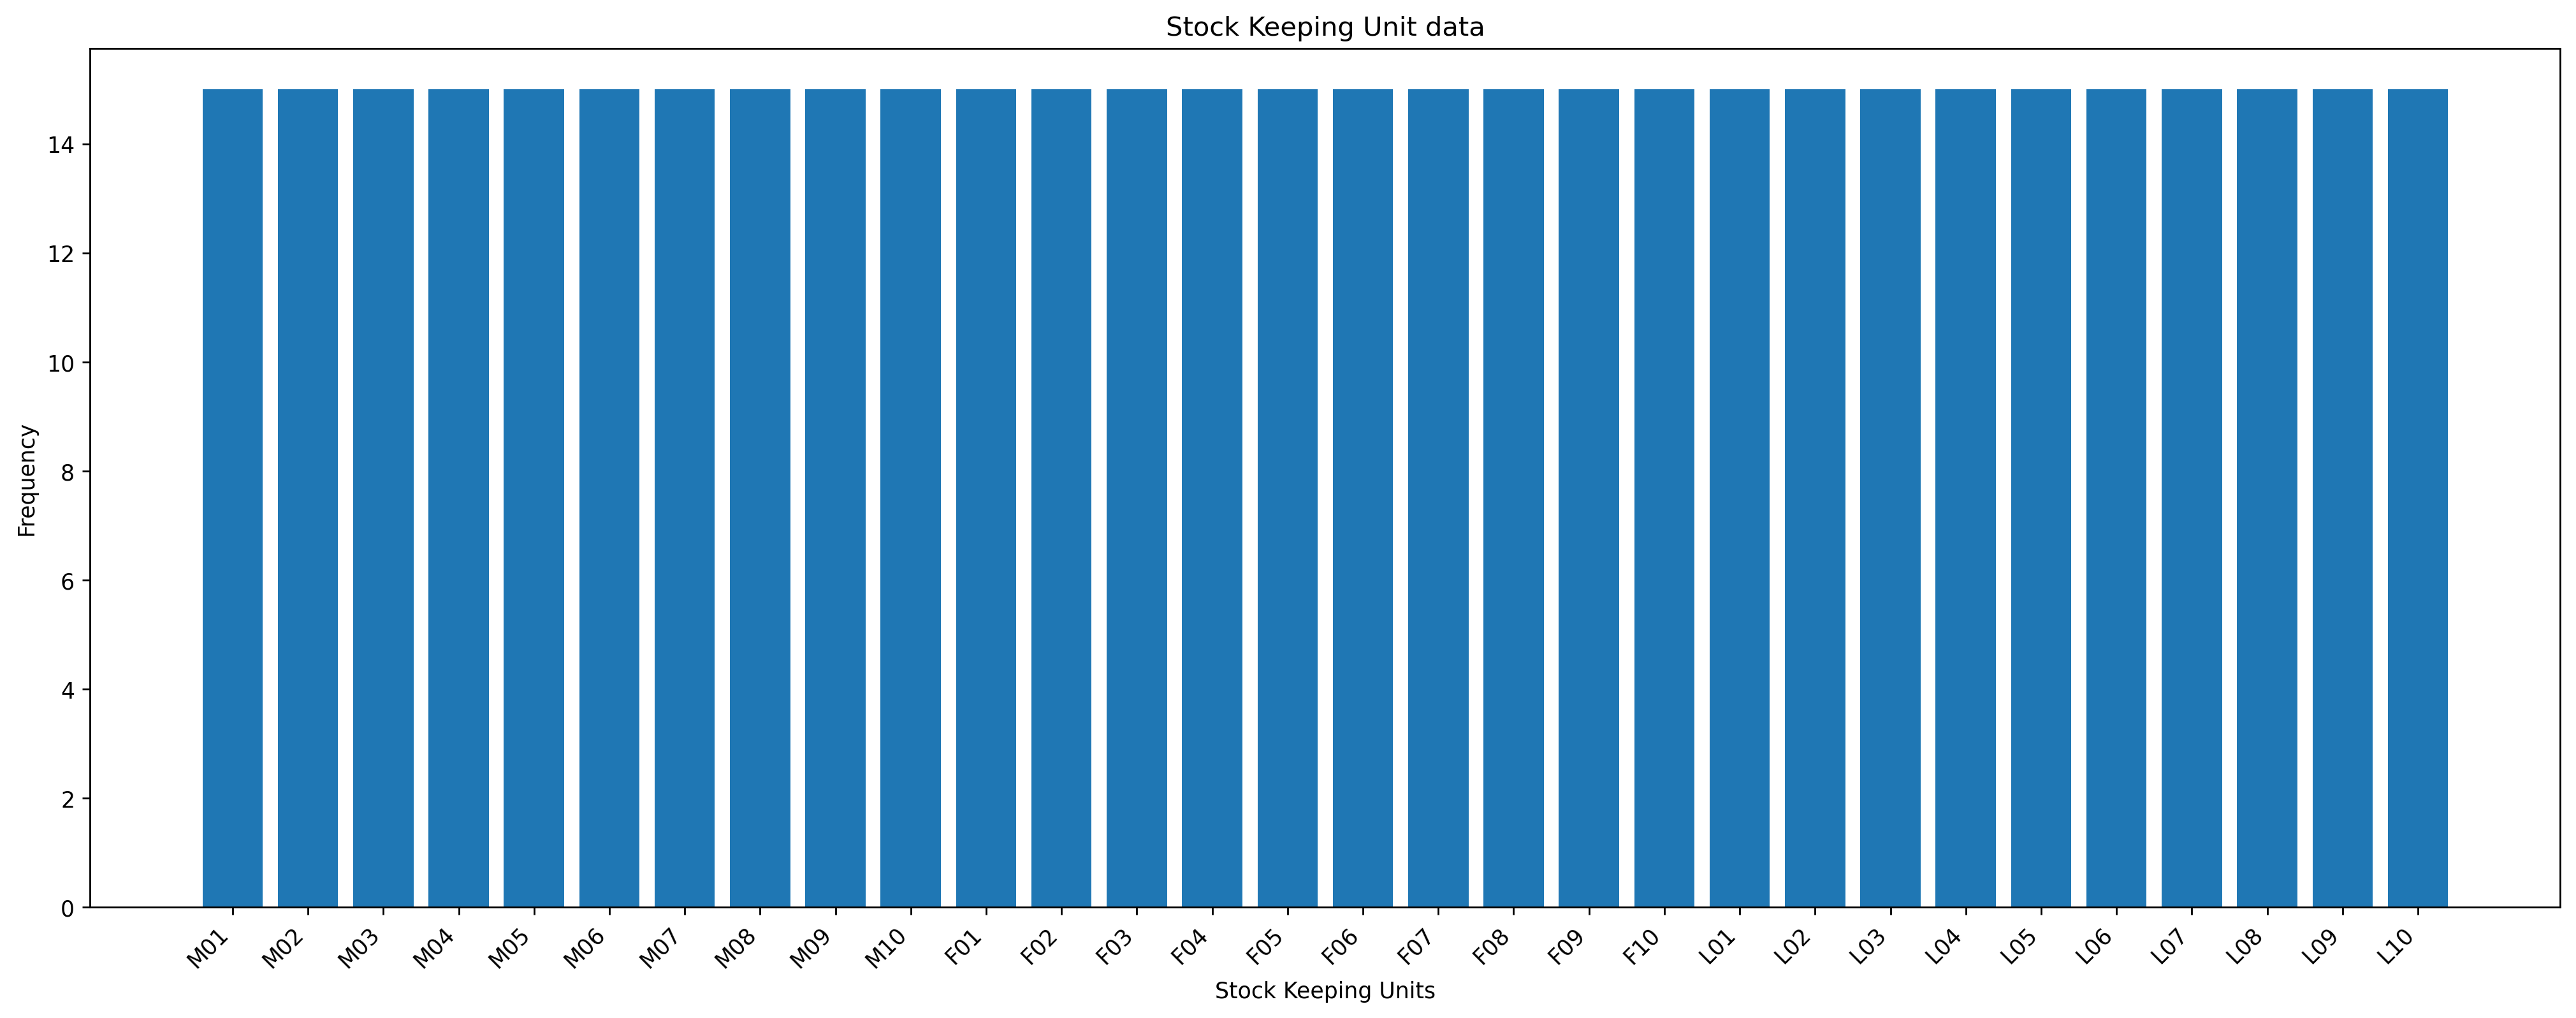

In [26]:
plt.bar(SKU_Frequency.index,SKU_Frequency.values)
plt.title('Stock Keeping Unit data')
plt.xlabel('Stock Keeping Units')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
City_Frequency=cc['City'].value_counts() #display series of unique values with its count
City_Frequency

C    450
Name: City, dtype: int64

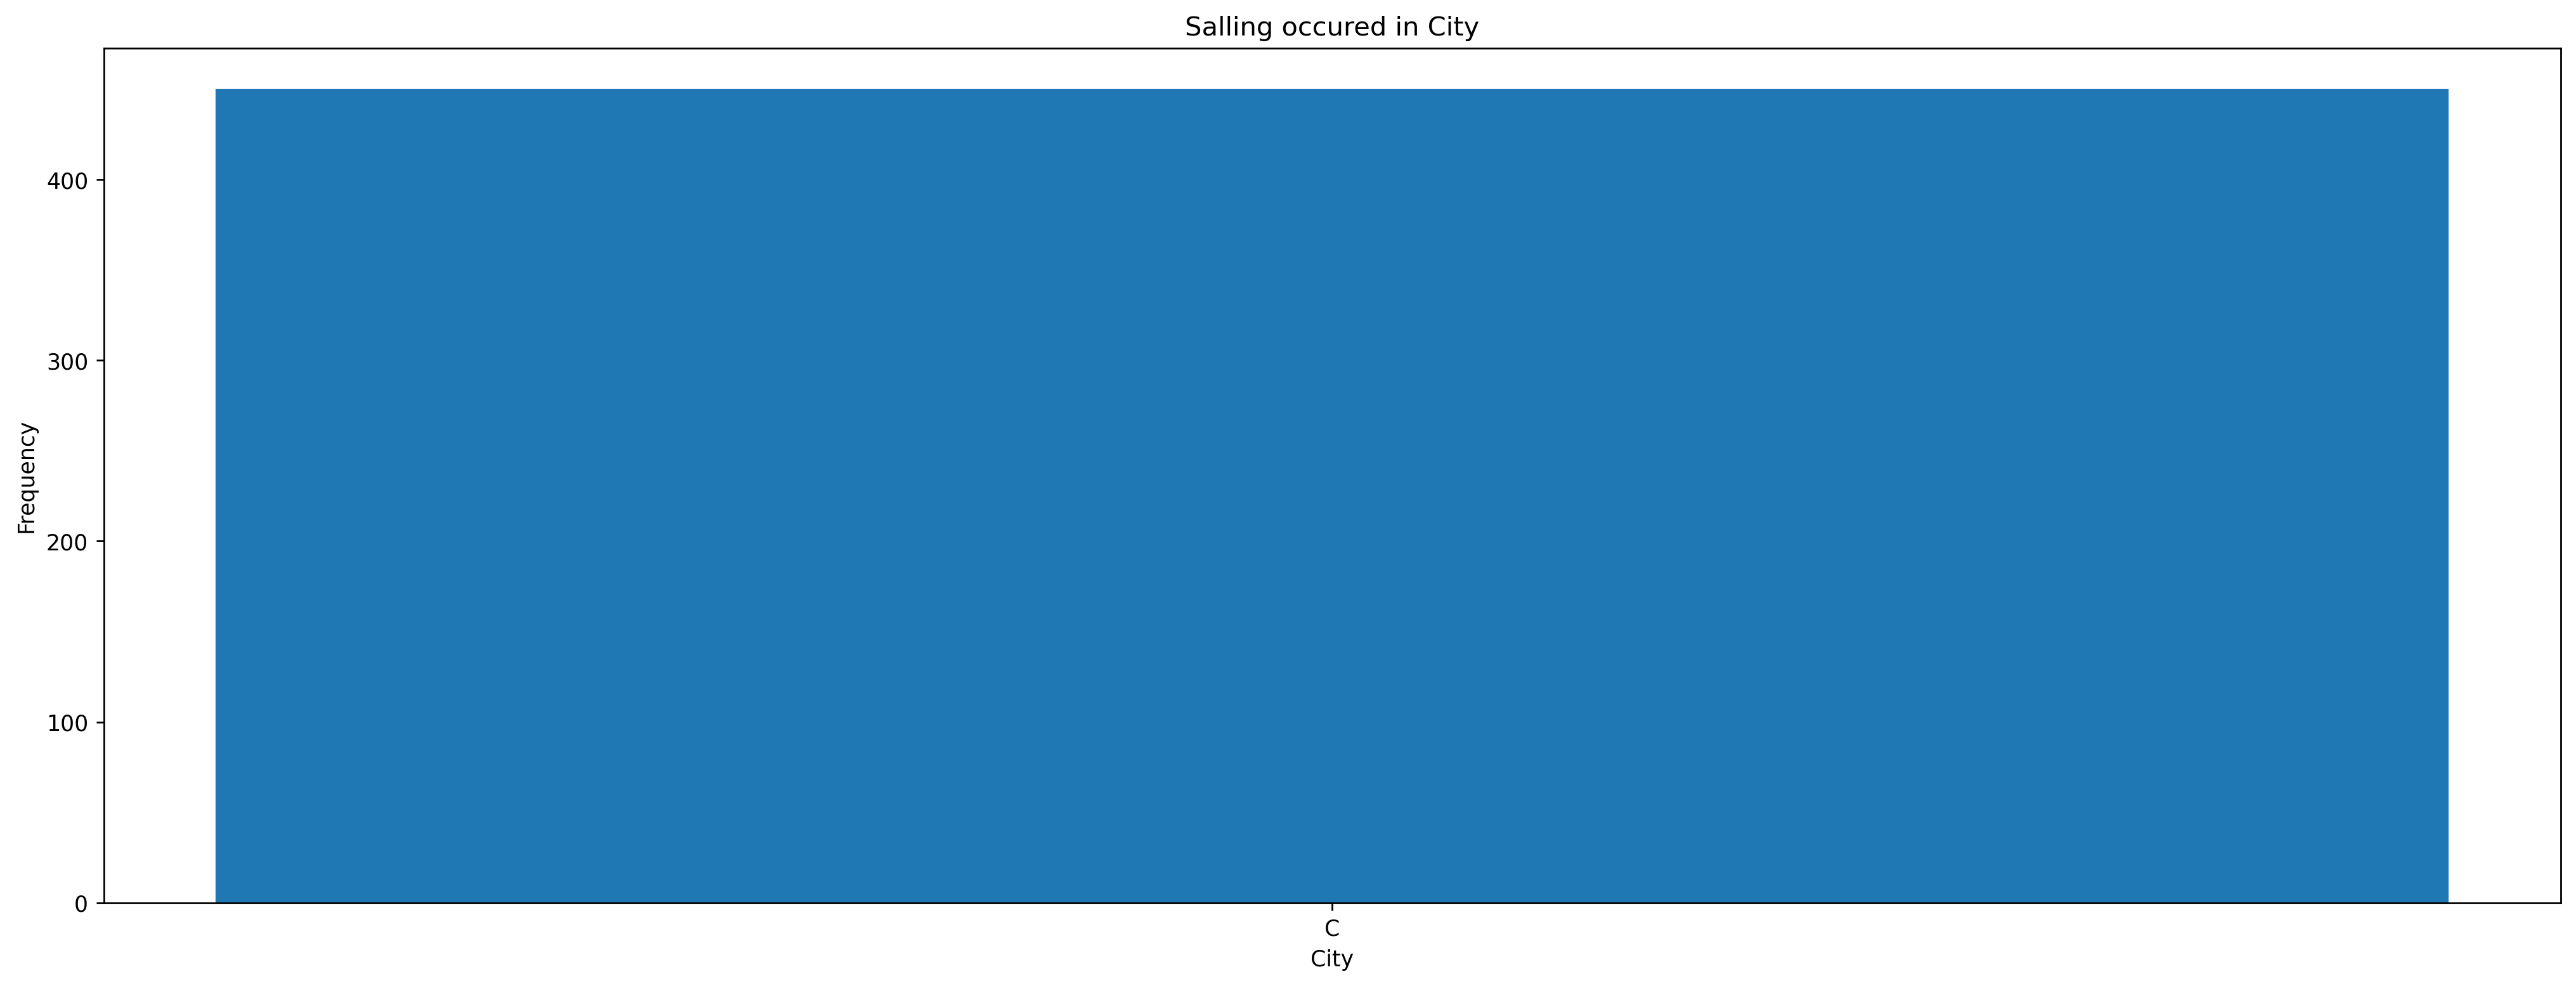

In [28]:
plt.bar(City_Frequency.index,City_Frequency.values)
plt.title('Salling occured in City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250

In [29]:
BU_Frequency=cc['BU'].value_counts() #display series of unique values with its count
BU_Frequency

Mobiles      150
FMCG         150
Lifestyle    150
Name: BU, dtype: int64

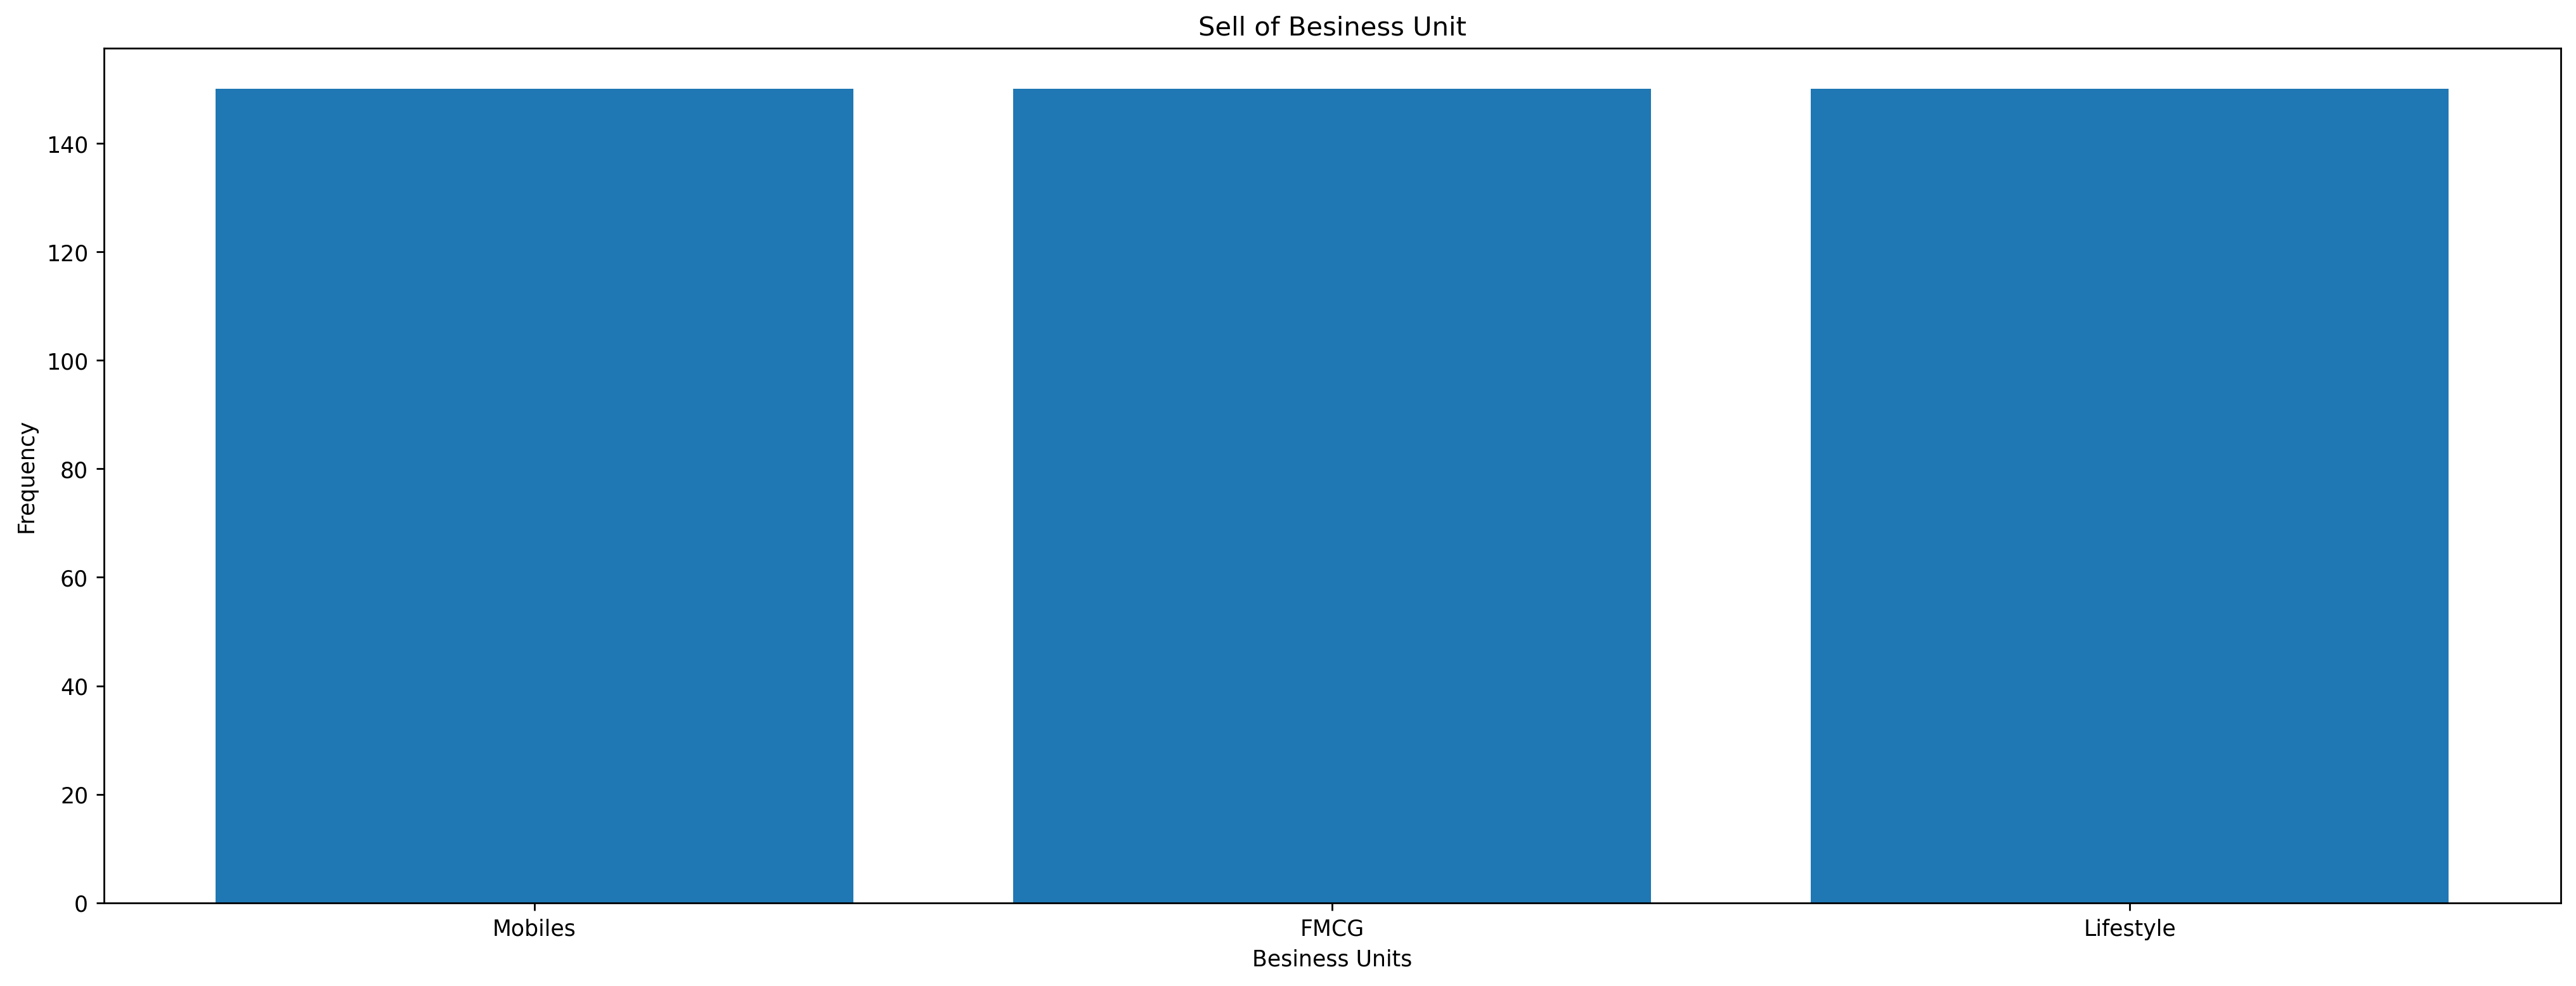

In [30]:
plt.bar(BU_Frequency.index,BU_Frequency.values)
plt.title('Sell of Besiness Unit')
plt.xlabel('Besiness Units')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250

In [31]:
Brand_Frequency=cc['Brand'].value_counts() #display series of unique values with its count
Brand_Frequency

Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: Brand, dtype: int64

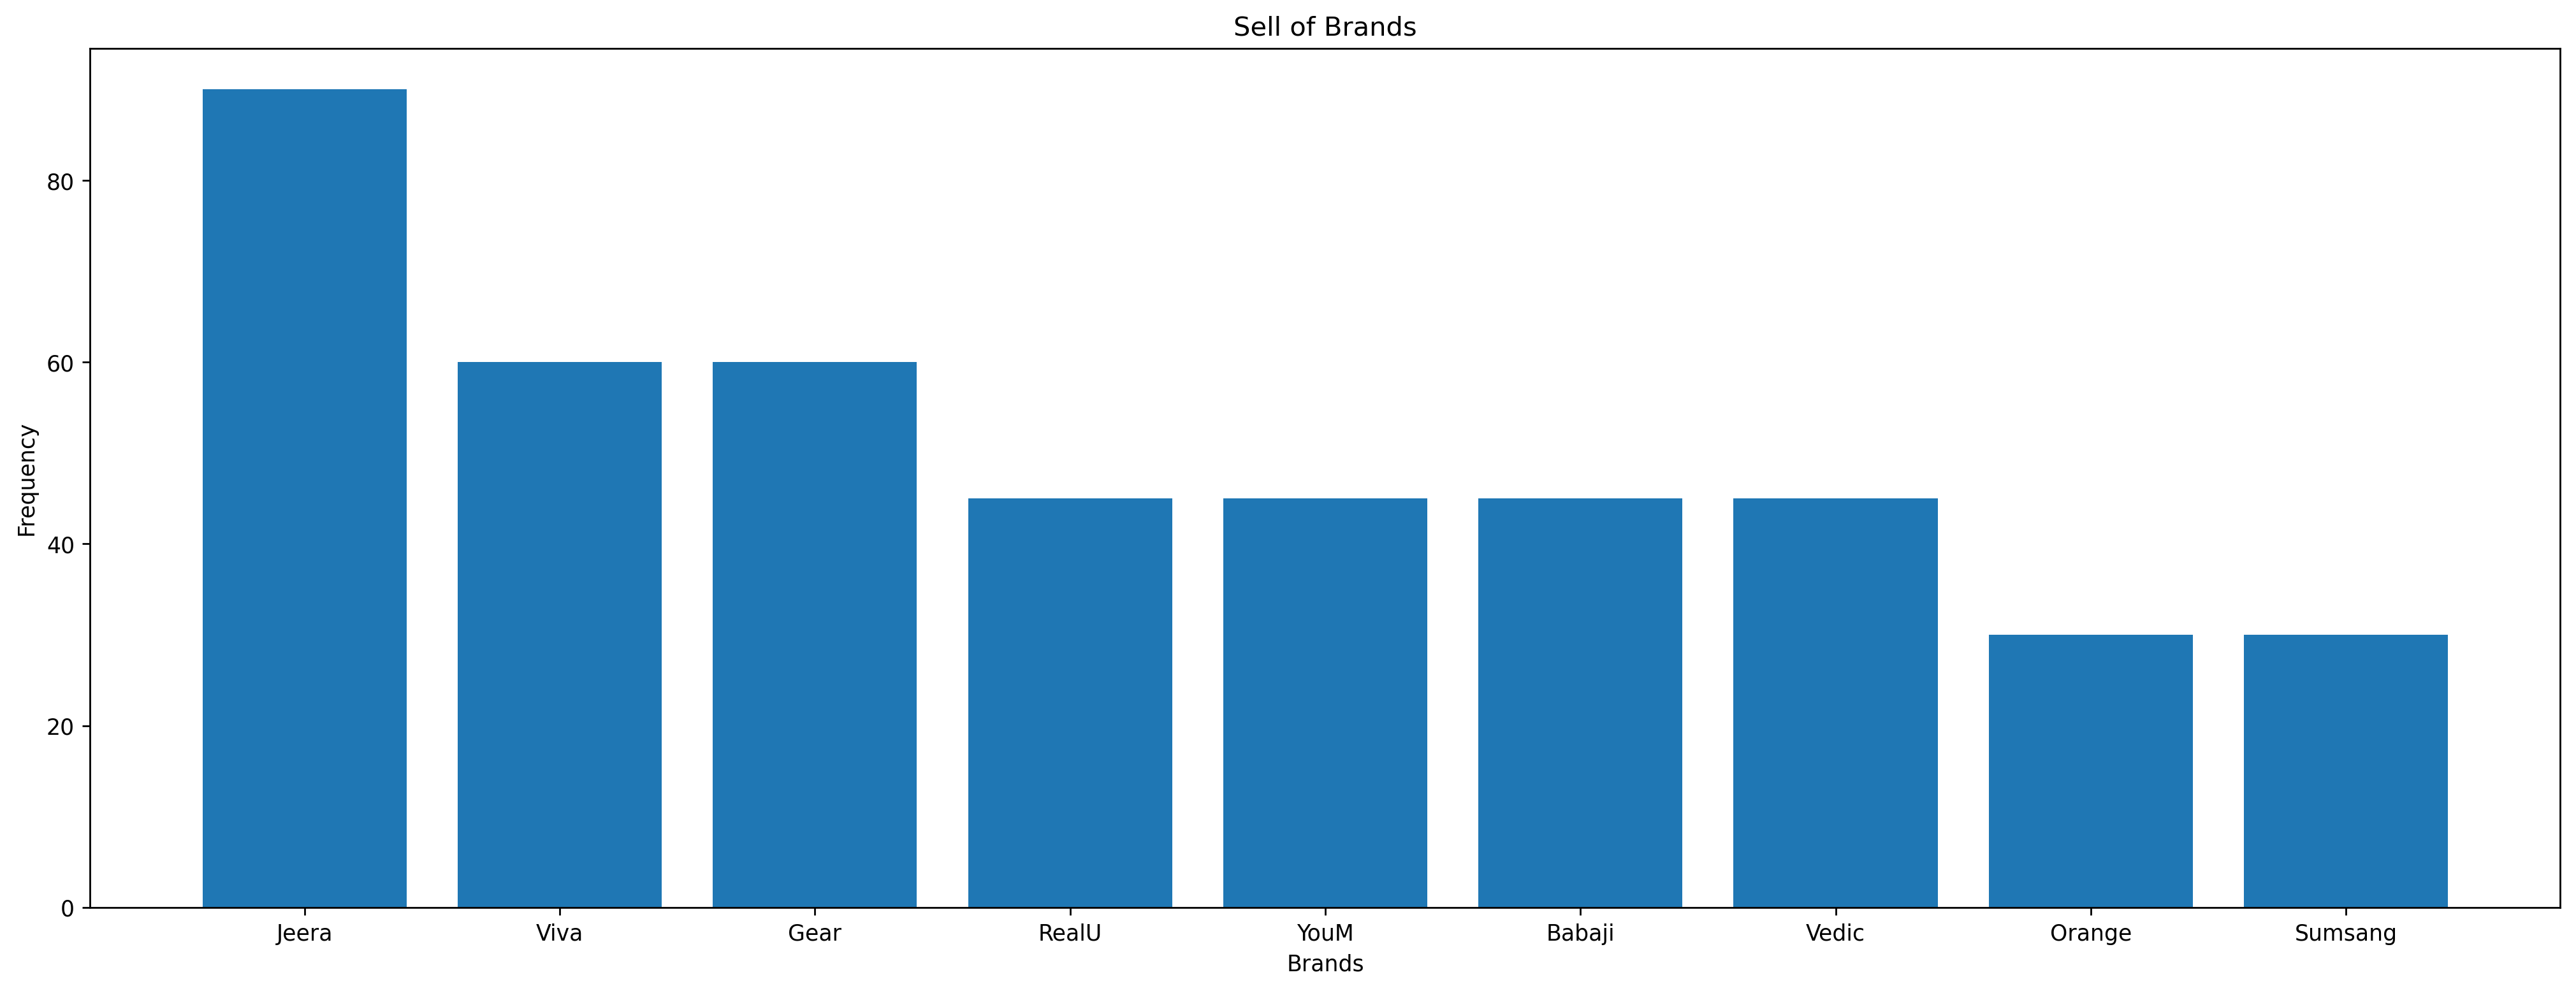

In [32]:
plt.bar(Brand_Frequency.index,Brand_Frequency.values)
plt.title('Sell of Brands')
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250

In [33]:
Model_Frequency=cc['Model'].value_counts() #display series of unique values with its count
Model_Frequency

RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             15
RU-9              15
S-20              15
S-21              15
O-10              15
O-11              15
Babaji Oil        15
Vedic Cream       15
Vedic Shampoo     15
Babaji Shampoo    15
Babaji Cream      15
Vedic Oil         15
Gear Oil          15
Gear Cream        15
Gear Shampoo      15
Gear BB Cream     15
M- T Shirts       15
M- Inners         15
W-Casuals         15
W-Inners          15
M-Jeans           15
M-Casuals         15
W-Western         15
W-Lounge          15
M-Formals         15
M-Shoes           15
Name: Model, dtype: int64

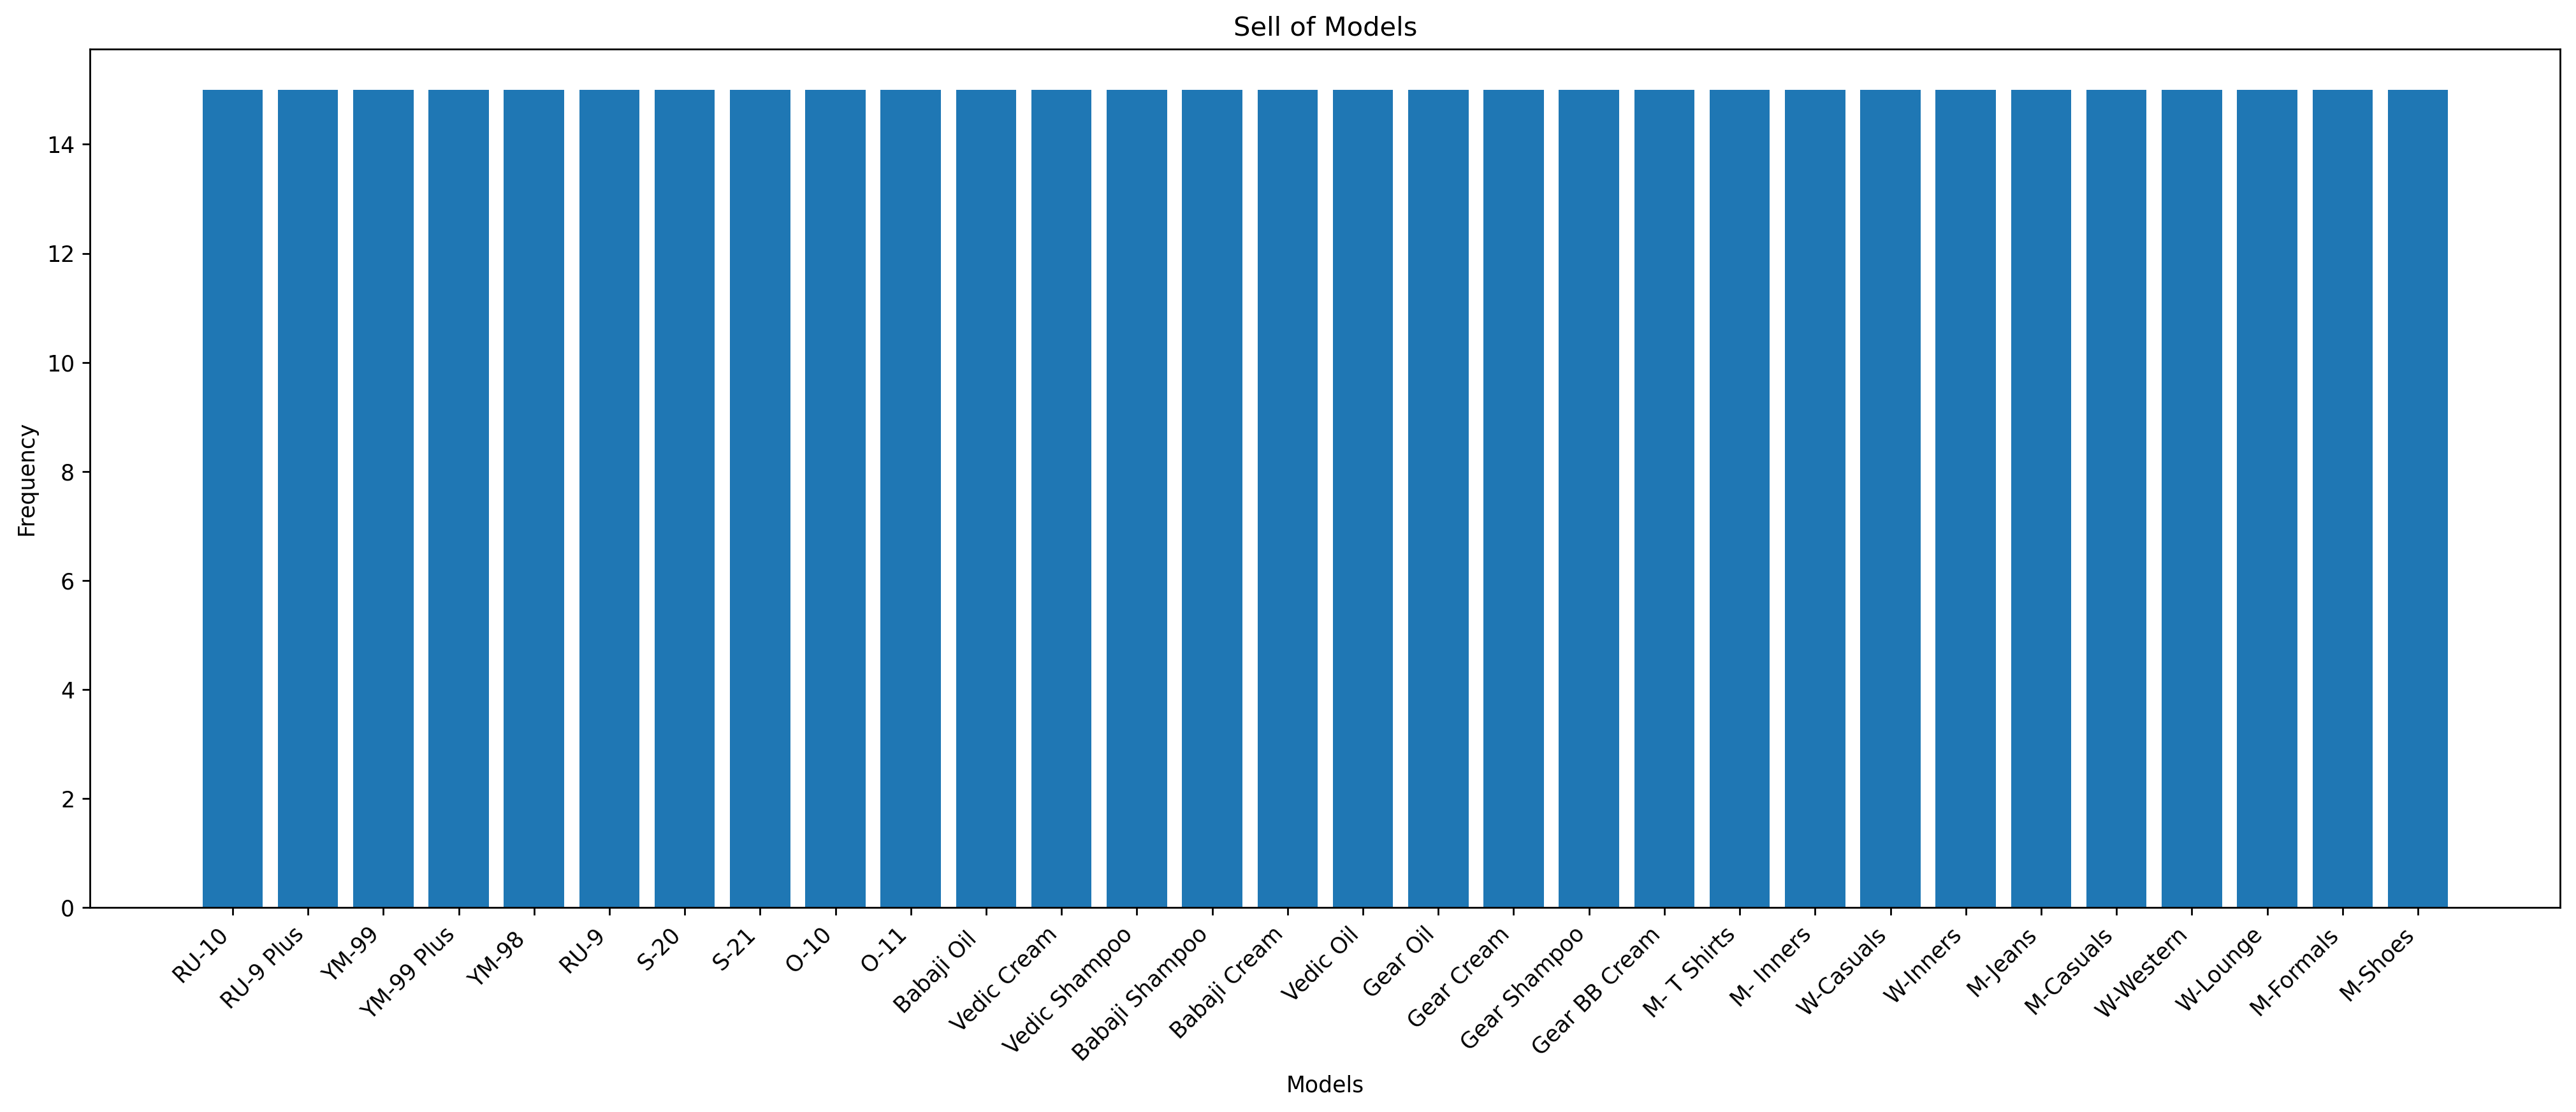

In [34]:
plt.bar(Model_Frequency.index,Model_Frequency.values)
plt.title('Sell of Models')
plt.xlabel('Models')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams['figure.dpi']=250
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
nc.columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [36]:
sc=StandardScaler() #StandardScaler class is stored sc variable 
sc.fit_transform(nc) #transforms data into z-score to normalize metrics of data present in each column of numerical dataframe for further operations

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

In [37]:
nc_st=pd.DataFrame(sc.fit_transform(nc),columns=nc.columns) #to store z-score standardize data new dataframe created
nc_st #varible in which z-score transforme data is stored

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [38]:
nc_st.describe() #it describes the standardized numerical dataframe

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


In [39]:
cc.columns # to display columns in 'cc' variable

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [40]:
cc_Date_ohe=pd.get_dummies(cc['Date']) # categorical column converts into dummy variable in terms of 0 and 1
# cc_Date_ohe=cc_Date_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_Date_ohe

,01-04-2021,02-04-2021,03-04-2021,04-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,10-04-2021,11-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
cc_Date_ohe=pd.get_dummies(cc['Date']) # it converts categorical column into dummy variable in terms of 0 and 1
# cc_Date_ohe=cc_Date_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_Date_ohe # to display converted column this variable created

,01-04-2021,02-04-2021,03-04-2021,04-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,10-04-2021,11-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
cc_Day_ohe=pd.get_dummies(cc['Day'])
# cc_Day_ohe=cc_Day_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_Day_ohe

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,0
446,0,0,0,0,1,0,0
447,0,0,0,0,1,0,0
448,0,0,0,0,1,0,0


In [43]:
cc_SKU_ohe=pd.get_dummies(cc['SKU'])
# cc_SKU_ohe=cc_SKU_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_SKU_ohe

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,...,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cc_City_ohe=pd.get_dummies(cc['City'])
# cc_City_ohe=cc_City_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_City_ohe

,C
0,1
1,1
2,1
3,1
4,1
...,...
445,1
446,1
447,1
448,1


In [45]:
cc_BU_ohe=pd.get_dummies(cc['BU'])
# cc_BU_ohe=cc_BU_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_BU_ohe

,FMCG,Lifestyle,Mobiles
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
445,0,1,0
446,0,1,0
447,0,1,0
448,0,1,0


In [46]:
cc_Brand_ohe=pd.get_dummies(cc['Brand'])
# cc_Brand_ohe=cc_Brand_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_Brand_ohe

,Babaji,Gear,Jeera,Orange,RealU,Sumsang,Vedic,Viva,YouM
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
445,0,0,1,0,0,0,0,0,0
446,0,0,0,0,0,0,0,1,0
447,0,0,0,0,0,0,0,1,0
448,0,0,1,0,0,0,0,0,0


In [47]:
cc_Model_ohe=pd.get_dummies(cc['Model'])
# cc_Model_ohe=cc_Model_ohe.astype(int) # converted dummy variable(boolean = True/False) replaces with binary numbers in form of 0 and 1
cc_Model_ohe

,Babaji Cream,Babaji Oil,Babaji Shampoo,Gear BB Cream,Gear Cream,Gear Oil,Gear Shampoo,M- Inners,M- T Shirts,M-Casuals,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
